# Regressão Linear

# Problema: predição do valor de um imóvel

<div>
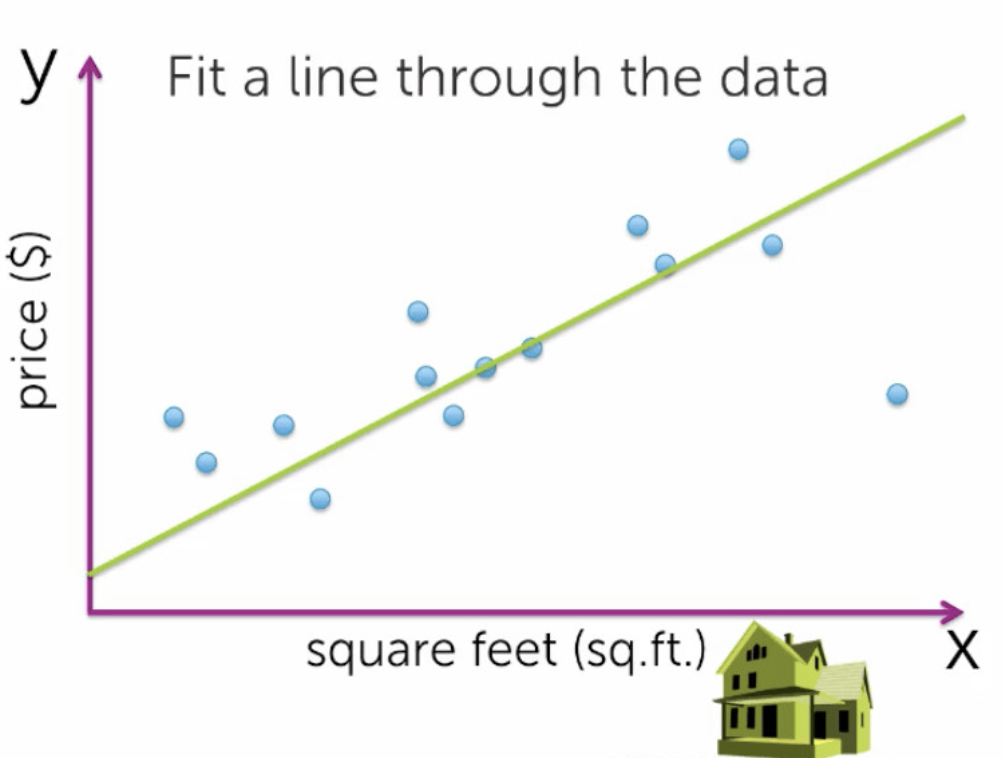
</div>

In [1]:
# Carregando o dataset Boston do sklearn para estimação dos valores de venda de um imóvel (em milhares de dólares)

from sklearn.datasets import load_boston

dataset = load_boston()

/home/raulgomes/.cache/pypoetry/virtualenvs/pos-graduacao-bP6nfZFd-py3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Al

In [5]:
#import pandas as pd
#import numpy as np
#
#data_url = "http://lib.stat.cmu.edu/datasets/boston"
#raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
#data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
#dataset = raw_df.values[1::2, 2]

In [12]:
# Verificando o shape do dataset: número de instâncias (linhas), número de atributos (colunas)

dataset.data.shape

(506, 13)

In [10]:
# Verificando o conteúdo da variável 'dataset'

dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [2]:
# Carregando os atributos de entrada em um Pandas dataframe

import pandas as pd

df = pd.DataFrame(dataset.data, columns = dataset.feature_names)

In [3]:
# Visualizando as primeiras linhas e colunas do dataframe

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
# Adicionando a variável de saída ao dataframe criado

df["MEDV"] = dataset.target

In [5]:
# Visualizando as primeiras linhas e colunas do dataframe

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


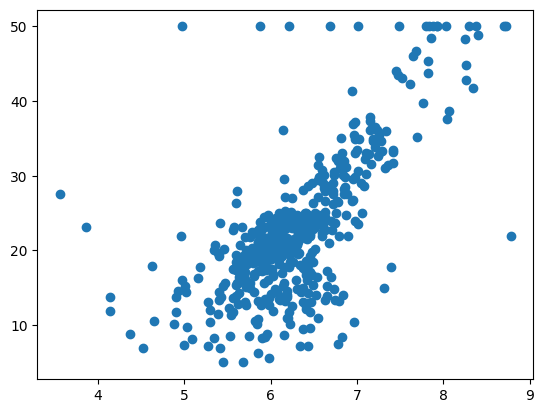

In [7]:
# Visualizando a relação entre as variáveis 'número de quartos' e 'valor do imóvel'

import matplotlib.pyplot as plt
import numpy as np

x_axis = df[["RM"]].to_numpy()
y_axis = df[["MEDV"]].to_numpy()

plt.scatter(x_axis, y_axis)
plt.show()

In [8]:
# Verificando se existem colunas com entradas nulas

df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
# Avaliando a correlação dos atributos de entrada com a variável-alvo de saída para reduzir dimensionalidade

corr = df.corr() 

print(corr)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

# Atributos de interesse:

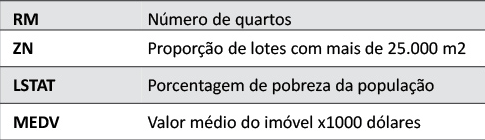

In [11]:
# Definindo os atributos de entrada (apenas um subconjunto dos atributos atributos originais)

X = df[["LSTAT", "RM", "ZN"]]

In [12]:
# Verificando o conteúdo de X

X.head()

,LSTAT,RM,ZN
0,4.98,6.575,18.0
1,9.14,6.421,0.0
2,4.03,7.185,0.0
3,2.94,6.998,0.0
4,5.33,7.147,0.0


In [13]:
# Definindo a variável de saída (preço do imóvel)

y = df["MEDV"]

In [14]:
# Verificando o conteúdo de y

y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [15]:
# Realizando split do dataset em treino (entrada e saída) e teste (entrada e saída)

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 5)

In [16]:
# Verificando o shape do conjunto de treino de entrada

x_treino.shape

(354, 3)

In [17]:
# Verificando o shape do conjunto de teste de entrada

x_teste.shape

(152, 3)

In [18]:
# Verificando o shape do conjunto de treino de saída (rótulos)

y_treino.shape

(354,)

In [19]:
# Verificando o shape do conjunto de teste de saída (rótulos)

y_teste.shape

(152,)

In [20]:
# Definindo o regressor Linear Regression

from sklearn.linear_model import LinearRegression

Linear_Regression_model = LinearRegression()

In [21]:
# Treinando o regressor Linear Regression

Linear_Regression_model.fit(x_treino, y_treino)

LinearRegression()

In [22]:
# Realizando predições no conjunto de teste

predicoes = Linear_Regression_model.predict(x_teste)

In [23]:
# Obtendo o acerto médio do regressor no conjunto de teste

score = Linear_Regression_model.score(x_teste, y_teste)

print("\nScore do regressor:", score)


Score do regressor: 0.6137630456347534


In [24]:
# Imprimindo as predições do regressor para o conjunto de teste

print(predicoes)

[36.53052117 30.6695763  25.21105554  1.58393692 33.14603458  8.62546898
 29.87820615 27.16264527 25.77432115 21.7921544  31.62371484 22.56652927
 22.35904028 31.05872808 26.93131686 20.29736126  0.51433401 17.56041971
 12.51711523 21.24731464  5.69659588 23.53430843 36.9664496  24.06309986
 31.08483704 13.04717976 26.24429824 22.0191252  26.71225448 29.46602973
 12.0309678  10.83945985 17.91496643 24.83436697 26.45398681 22.59360708
 25.76716819 12.86713808 36.93453143 34.15148075 20.11821034  2.34958977
 26.93364954 16.65425326 26.73827633 30.71861243 -1.65690837 17.26669476
 20.4578429  14.33563561 20.48796718 21.10170804 24.50537747 16.38316515
 17.42252237 28.93189869 35.2050531  19.82386839 28.06127175 20.59648949
 19.86015505 22.49880613 16.45995353 30.38599925 22.14053057 13.18945329
 23.05588776 25.09823733 22.36368148 21.1031335  19.28052763 25.59915124
 16.65376235 20.33518135 19.25929932 31.49287511 19.07354298 13.30584797
 28.45704683 18.89278858 21.74579908 38.00432475 15

In [25]:
# Realizando predição para valores não vistos

caracteristicas = [[4.70, 6.00, 80.00]]

predicao = Linear_Regression_model.predict(caracteristicas)

print (predicao)

[27.67170696]


In [26]:
# Imprimindo os coeficientes aprendidos pelo regressor

Linear_Regression_model.coef_

array([-0.63316605,  4.75852277,  0.02303304])